# Matrix Multiplication from Basics

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Load Data

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_path = Path("./data")
data_path.mkdir(exist_ok=True)

In [3]:
gz_path = data_path/"mnist.pkl.gz"

# let's download it

In [4]:
from urllib.request import urlretrieve
if not gz_path.exists():
    urlretrieve(MNIST_URL, gz_path)

In [5]:
gz_path.exists()

True

## Let's Unzip them

In [58]:
with gzip.open(gz_path, 'rb') as f:
    gz_content = pickle.load(f, encoding="latin-1")
    train_x, train_y = gz_content[0]
    valid_x, valid_y = gz_content[1]

In [59]:
len(train_x), len(train_x[0])

(50000, 784)

In [60]:
len(valid_x), len(valid_x[0])

(10000, 784)

## Representing an Image

In [37]:
sample_img_data = train_x[0]
len(sample_img_data)

784

In [39]:
def make_chunks(lst, size):
    for i in range(0, len(lst), size):
        yield lst[i: i+size]

In [40]:
it = make_chunks(sample_img_data, 10)

In [48]:
sample_img = list(make_chunks(sample_img_data, 28))
len(sample_img), len(sample_img[0])

(28, 28)

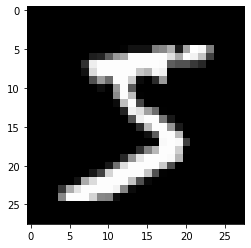

In [70]:
plt.imshow(sample_img, cmap="gray")

### Let's use `torch.tensor`

Yeah! We were not going to use pytorch. But we created a bare bone of a tensor. Then let's use the real one.

In [90]:
from torch import tensor
import torch

In [61]:
train_x = tensor(train_x)
train_y = tensor(train_y)
valid_x = tensor(valid_x)
valid_y = tensor(valid_y)

In [63]:
train_x.shape, train_y.shape

(torch.Size([50000, 784]), torch.Size([50000]))

In [68]:
# Reshaping them
train_x = train_x.reshape(-1, 28, 28)
valid_x = valid_x.reshape(-1, 28, 28)
train_x.shape, valid_x.shape

(torch.Size([50000, 28, 28]), torch.Size([10000, 28, 28]))

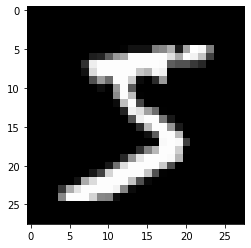

In [71]:
plt.imshow(train_x[0], cmap="gray")

## Random Number Generator

In [72]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [74]:
seed(42)
rnd_state

(43, 1, 1)

In [75]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [76]:
rand(), rand()

(0.25420336316883324, 0.46884405296716114)

In [89]:
%timeit rand_list = tensor([rand() for i in range(28 * 28)])

366 µs ± 6.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [91]:
%timeit torch.rand(28, 28)

4.31 µs ± 25.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


**So, it's clear that, we need to use the pytorch's version because it's very fast**